# Social tipping points

### Sibel Eker


This notebook presents a bibliometric and text-mining analysis on social tipping points literature. 



- Title, abstract and keywords include 

"social tipping"  OR  "positive tipping"  OR  "sensitive intervention points"  OR  "socio-ecological tipping"  OR  "socio-economic tipping"

- Returned 59 documents

- 5 more added based on our own knowledge.. 

## Data preparation - Parsing the text file

In [3]:
directory = 'C:/Users/U219200/OneDrive - Radboud Universiteit/RU-Drive/Documents/Research/Projects/archive/TippingPoints_backup/Review/'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [16]:
dff= pd.read_excel(directory+'review_may23.xlsx')

In [17]:
dff.head()

,Reference,Year,Included,Theoretical or Empirical,Source of Evidence,Presentation of Evidence,Number of ST Systems,Type of Feedbacks in ST Dynamics,Geographic Emphasis
0,Heerma van Voss and Rafaty 1,2022,yes,Empirical,Selected lit,Narrative,Single,Positive,GS
1,"Tàbara, et al. 2",2022,yes,Theoretical,Selected lit,Narrative,Single,Positive,GS
2,"Winkelmann, et al. 3",2022,yes,Theoretical + Empirical,Other,Narrative,Multiple,Positive,GN
3,"Lenton, et al. 4",2022,yes,Theoretical + Empirical,Selected lit,Narrative + Qual mapping,Multiple,Positive + Negative,NaN
4,"Chapin, et al. 5",2022,yes,Theoretical + Empirical,Selected lit,Narrative,Multiple,Positive,GN + GS


In [18]:
cols = ['Theoretical or Empirical', 'Source of Evidence', 'Presentation of Evidence', 
        'Number of ST Systems', 'Type of Feedbacks in ST Dynamics',  'Geographic Emphasis']

# Coding visualization

In [19]:
dff = dff.replace(to_replace='NAv', value='Not\navailable')

In [20]:
dff = dff.fillna('NA')

In [21]:
dff = dff.replace(to_replace='Selected lit', value='Selected literature')

In [22]:
dff = dff.replace(to_replace='Lit review', value='Literature review')

In [23]:
dff.groupby(['Source of Evidence']).size().sort_values()

Source of Evidence
Lab experiment          3
Literature review       4
Opinion survey          4
Other                   5
Market data             7
Selected literature    13
dtype: int64

In [24]:
dff.groupby(['Geographic Emphasis']).size().sort_values().index

Index(['GS', 'NA', 'GN + GS', 'GN'], dtype='object', name='Geographic Emphasis')

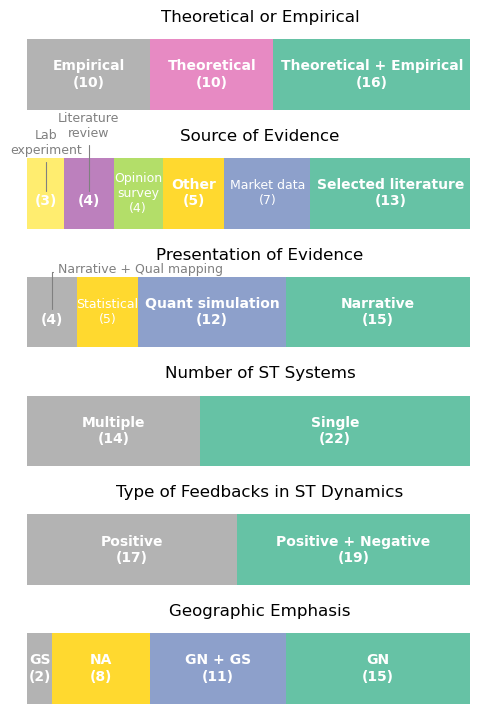

In [25]:
# make a grid 7x1; single bar chart on each with title
fig, axes = plt.subplots(6,1)
fig.set_size_inches(6,9)
fig.subplots_adjust(hspace=0.2, )
cols = ['Theoretical or Empirical', 'Source of Evidence', 'Presentation of Evidence', 
        'Number of ST Systems', 'Type of Feedbacks in ST Dynamics', 'Geographic Emphasis'] #'Interactions across ST Systems',
t = 0
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set2_r.colors)
for i, col in enumerate(cols):
    m = 0
    dfp = pd.DataFrame(dff.groupby([col]).size())
    dfp.columns=['values']
    dfp = dfp.sort_values('values')
    if col == "Source of Evidence":
        set2 = mpl.colormaps['Set2_r'].colors
        newcolors = mpl.colormaps['Set3_r'].colors[:6]
        cmap = mpl.colors.ListedColormap(newcolors+set2)
    else:
        cmap = 'Set2_r'
    axes[i] = dfp.T.plot(ax=axes[i], kind='barh', stacked=True, width=1.25, legend=False, colormap=cmap,)
    axes[i].set_title(col, pad=0)
    axes[i].set_yticks([])
    axes[i].set_xticks([])

    for j, p in enumerate(axes[i].patches):
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        label = dfp.iloc[[j]].index.values[0]
        if label == 'Cross-Scale':
            txt = 'Cross-\nScale' + '\n' + '({:.0f})'.format(width)
            axes[i].text(x+width/2, y+height/2, txt, 
                    horizontalalignment='center', verticalalignment='center', 
                    color='white', weight='bold')
        elif label in ['Statistical', 'Market data']:
            txt = label + '\n' + '({:.0f})'.format(width)
            axes[i].text(x+width/2, y+height/2, txt, 
                    horizontalalignment='center', verticalalignment='center', 
                    color='white', fontsize=9)
        elif label in ['non-specific']:
            txt = '' + '\n' + '({:.0f})'.format(width)
            axes[i].text(x+width/2, y+height/2, txt, 
                    horizontalalignment='center', verticalalignment='center', 
                    color='white', weight='bold')
            axes[i].annotate(label, xy=(x+width/2, y+height/2), xycoords='data',
                     xytext=(x+width/2, .9), textcoords='data', ha='center', color='grey', fontsize=9,
                    arrowprops=dict(arrowstyle='-', lw=.8, color='grey'))    
        elif label in ['Qual mapping', 'Narrative + Qual mapping']:
            txt = '' + '\n' + '({:.0f})'.format(width)
            axes[i].text(x+width/2, y+height/2, txt, 
                    horizontalalignment='center', verticalalignment='center', 
                    color='white', weight='bold')
            axes[i].annotate(label, xy=(x+width/2, y+height/2), xycoords='data',
                    xytext=(x+width/2+0.5, y+height/2+0.7), textcoords='data', ha='left', color='grey', fontsize=9,
                    arrowprops=dict(arrowstyle='-', lw=.8, color='grey', relpos=(1,0.25),
                                   connectionstyle="angle,angleA=180,angleB=-90,rad=0")) 
            m-=0.3
        elif label in ['Field trial', 'Focus groups, market data', 'Lit review, market data',
                       'Market data, scenario projections', 'Selected lit, Opinion survey',
                       'Systematic lit review', 'Expert elicitation, workshop, lit review', 
                       'Parametric', 'Selected lit, market data',]:
            txt = '' + '\n' + '{:.0f}'.format(width)
            axes[i].text(x+width/2, y+height/2, txt, 
                    horizontalalignment='center', verticalalignment='center', 
                    color='white', weight='bold')
        elif label in ['Literature review', 'Lab experiment']:
            txt = '' + '\n' + '({:.0f})'.format(width)
            labels = label.split(' ')
            newlabel = labels[0]+'\n'+labels[1]
            axes[i].text(x+width/2, y+height/2, txt, 
                    horizontalalignment='center', verticalalignment='center', 
                    color='white', weight='bold')
            axes[i].annotate(newlabel, xy=(x+width/2, y+height/2), xycoords='data',
                    xytext=(x+width/2, y+height/2+m+0.7), textcoords='data', ha='center', color='grey', fontsize=9,
                    arrowprops=dict(arrowstyle='-', lw=.8, color='grey', relpos=(1, 0.25), 
                                    connectionstyle="angle,angleA=180,angleB=-90,rad=0")) 
            m+=0.3
        elif label in ['Opinion survey']:
            labels = label.split(' ')
            newlabel = labels[0]+'\n'+labels[1]
            txt = newlabel + '\n' + '({:.0f})'.format(width)
            
            axes[i].text(x+width/2, y+height/2, txt, 
                    horizontalalignment='center', verticalalignment='center', 
                    color='white', fontsize=9)
            #axes[i].annotate(newlabel, xy=(x+width/2, y+height/2), xycoords='data',
            #        xytext=(x+width/2, y+height/2), textcoords='data', ha='center', color='grey', fontsize=9,
            #        arrowprops=dict(arrowstyle='-', lw=.8, color='grey', relpos=(1, 0.25), 
            #                        connectionstyle="angle,angleA=180,angleB=-90,rad=0")) 
                
        else:
            if width >= 2:
                txt = label + '\n' + '({:.0f})'.format(width)
                axes[i].text(x+width/2, y+height/2, txt, 
                        horizontalalignment='center', verticalalignment='center', 
                        color='white', weight='bold')

    sns.despine(left=True, bottom=True)
    #axes[i].set_grid('off')
#plt.savefig(directory+'pubs_coding_May23.png', dpi=300, bbox_inches='tight' )
plt.savefig(directory+'pubs_coding_May23.tiff', dpi=300, bbox_inches='tight' )
plt.show()